In [229]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('data/product_info.csv')

In [230]:
# The only required columns
data = data[['product_id', 'brand_name', 'product_name', 'ingredients', 'primary_category',
       'secondary_category', 'tertiary_category']]

# Checking for missing values
data.isnull().sum()

product_id              0
brand_name              0
product_name            0
ingredients           945
primary_category        0
secondary_category      8
tertiary_category     990
dtype: int64

In [231]:
# Dropping null values
data.dropna(subset=['ingredients'], inplace=True)
data.dropna(subset=['tertiary_category'], inplace=True)

In [232]:
# Counting duplicates
duplicate_count = data.duplicated(keep=False).sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [233]:
data['primary_category'].value_counts()

primary_category
Skincare           1920
Makeup             1907
Fragrance          1243
Hair               1163
Bath & Body         349
Men                  58
Tools & Brushes       2
Name: count, dtype: int64

In [234]:
# Filter the data for the 'Fragrance' primary category
fragrance_data = data[data['primary_category'] == 'Tools & Brushes']

# Group by tertiary category and count occurrences
tertiary_counts = fragrance_data.groupby('tertiary_category').size().reset_index(name='count')

# Display all tertiary categories and their counts
print(tertiary_counts)

          tertiary_category  count
0  Facial Cleansing Brushes      1
1           Teeth Whitening      1


The Process

-----------------------------------------------------------------------------------------------------

Removing products in the mini size category because it has no tertiary category

In [235]:
data.drop(data[data['primary_category'] == "Mini Size"].index, inplace=True)

Transforming unmatching product categories to the other category

In [236]:
# Update primary_category where tertiary_category is "Beauty Supplements"
data.loc[data['tertiary_category'] == "Beauty Supplements", 'primary_category'] = "Other"

In [237]:
# Update primary_category where tertiary_category is "Holistic Wellness"
data.loc[data['tertiary_category'] == "Holistic Wellness", 'primary_category'] = "Other"

In [238]:
# Update primary_category where tertiary_category is "Holistic Wellness"
data.loc[data['tertiary_category'] == "Makeup Removers", 'primary_category'] = "Makeup"

In [239]:
# Update primary_category where tertiary_category is "Teeth Whitening"
data.loc[data['tertiary_category'] == "Teeth Whitening", 'primary_category'] = "Other"

In [240]:
# Update primary_category where tertiary_category is "Brush Cleaners"
data.loc[data['tertiary_category'] == "Brush Cleaners", 'primary_category'] = "Other"

In [241]:
# Update primary_category where tertiary_category is "Brush Sets"
data.loc[data['tertiary_category'] == "Brush Sets", 'primary_category'] = "Other"

In [242]:
# Update primary_category where tertiary_category is "Eye Brushes"
data.loc[data['tertiary_category'] == "Eye Brushes", 'primary_category'] = "Other"

In [243]:
# Update primary_category where tertiary_category is "Face Brushes"
data.loc[data['tertiary_category'] == "Face Brushes", 'primary_category'] = "Other"

In [244]:
# Update primary_category where tertiary_category is "Sponges & Applicators"
data.loc[data['tertiary_category'] == "Sponges & Applicators", 'primary_category'] = "Other"

In [245]:
# Update primary_category where tertiary_category is "Accessories"
data.loc[data['tertiary_category'] == "Accessories", 'primary_category'] = "Other"

In [246]:
# Update primary_category where tertiary_category is "Hair Supplements"
data.loc[data['tertiary_category'] == "Hair Supplements", 'primary_category'] = "Other"

In [247]:
# Update primary_category where tertiary_category is "Candles"
data.loc[data['tertiary_category'] == "Candles", 'primary_category'] = "Other"

In [248]:
# Update primary_category where tertiary_category is "Diffusers"
data.loc[data['tertiary_category'] == "Diffusers", 'primary_category'] = "Other"

In [249]:
# Update primary_category where tertiary_category is "For Body"
data.loc[data['tertiary_category'] == "For Body", 'primary_category'] = "Skincare"

In [250]:
# Update primary_category where tertiary_category is "For Face"
data.loc[data['tertiary_category'] == "For Face", 'primary_category'] = "Skincare"

In [251]:
# Update primary_category where tertiary_category is "Bath & Body"
data.loc[data['primary_category'] == "Bath & Body", 'primary_category'] = "Other"

In [252]:
# Update primary_category where tertiary_category is "Tools & Brushes"
data.loc[data['primary_category'] == "Tools & Brushes", 'primary_category'] = "Other"

In [253]:
# Update primary_category where tertiary_category is "Men"
data.loc[data['primary_category'] == "Men", 'primary_category'] = "Other"

In [254]:
# Update primary_category where tertiary_category is "Body Sunscreen"
data.loc[data['tertiary_category'] == "Body Sunscreen", 'primary_category'] = "Skincare"

In [255]:
# Update primary_category where tertiary_category is "Blotting Papers"
data.loc[data['tertiary_category'] == "Blotting Papers", 'primary_category'] = "Other"

In [266]:
# Changing the tertiary category name
data.loc[data['tertiary_category'] == "Cologne Gift Sets", 'tertiary_category'] = "Cologne"

In [257]:
# Changing the tertiary category name
data.loc[data['tertiary_category'] == "Perfume Gift Sets", 'tertiary_category'] = "Perfume"

In [258]:
# Update primary_category where tertiary_category is "BB & CC Cream"
data.loc[data['tertiary_category'] == "Men", 'BB & CC Creams'] = "BB & CC Cream"
data.loc[data['tertiary_category'] == "BB & CC Cream", 'primary_category'] = "Skincare"

In [259]:
# Changing the tertiary category name
data.loc[data['tertiary_category'] == "BB & CC Creams", 'tertiary_category'] = "BB & CC Cream"

Deleting product category  from tertiary which has less than 10 value counts

In [260]:
# Step 1: Get categories with counts >= 10 (excluding "Other" primary category)
valid_categories = data.loc[data['primary_category'] != "Other", 'tertiary_category'].value_counts()
valid_categories = valid_categories[valid_categories >= 10].index  # Keep only categories with count >= 10

# Step 2: Filter the dataset
data = data[(data['tertiary_category'].isin(valid_categories)) | (data['primary_category'] == "Other")]


In [267]:
# Filter the data for the 'Fragrance' primary category
fragrance_data = data[data['primary_category'] == 'Fragrance']

# Group by tertiary category and count occurrences
tertiary_counts = fragrance_data.groupby('tertiary_category').size().reset_index(name='count')

# Display all tertiary categories and their counts
print(tertiary_counts)

           tertiary_category  count
0      Body Mist & Hair Mist     18
1                    Cologne    147
2                    Perfume    664
3  Rollerballs & Travel Size    276


In [262]:
# Checking for missing values
data['primary_category'].isnull().sum()

0

In [263]:
data['primary_category'].value_counts()

primary_category
Makeup       1877
Skincare     1856
Hair         1129
Fragrance    1105
Other         636
Name: count, dtype: int64

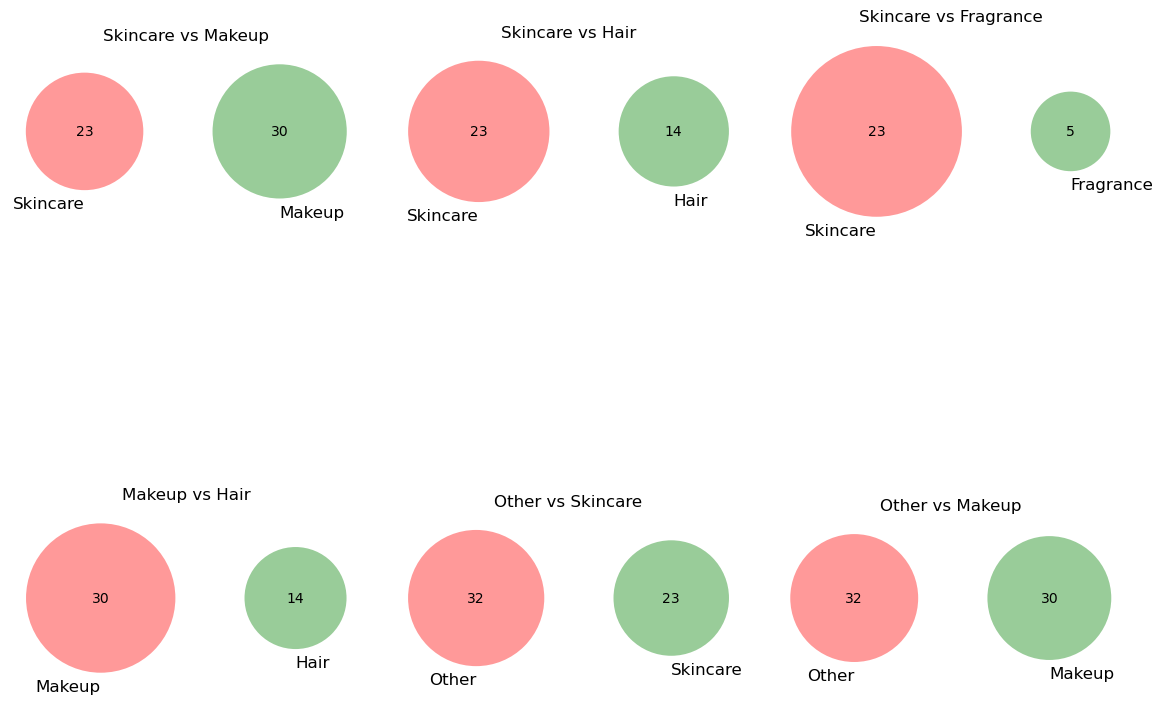

In [225]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create sets for each primary category
skincare_set = set(data[data['primary_category'] == 'Skincare']['tertiary_category'])
makeup_set = set(data[data['primary_category'] == 'Makeup']['tertiary_category'])
hair_set = set(data[data['primary_category'] == 'Hair']['tertiary_category'])
fragrance_set = set(data[data['primary_category'] == 'Fragrance']['tertiary_category'])
other_set = set(data[data['primary_category'] == 'Other']['tertiary_category'])  # Added "Other" category

# Create the Venn diagram
plt.figure(figsize=(12, 12))

# Skincare vs Makeup
plt.subplot(231)
venn2([skincare_set, makeup_set], ('Skincare', 'Makeup'))
plt.title('Skincare vs Makeup')

# Skincare vs Hair
plt.subplot(232)
venn2([skincare_set, hair_set], ('Skincare', 'Hair'))
plt.title('Skincare vs Hair')

# Skincare vs Fragrance
plt.subplot(233)
venn2([skincare_set, fragrance_set], ('Skincare', 'Fragrance'))
plt.title('Skincare vs Fragrance')

# Makeup vs Hair
plt.subplot(234)
venn2([makeup_set, hair_set], ('Makeup', 'Hair'))
plt.title('Makeup vs Hair')

# Other vs Skincare
plt.subplot(235)
venn2([other_set, skincare_set], ('Other', 'Skincare'))
plt.title('Other vs Skincare')

# Other vs Makeup
plt.subplot(236)
venn2([other_set, makeup_set], ('Other', 'Makeup'))
plt.title('Other vs Makeup')

plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------------

Cleaning the Ingredients column

In [269]:
# Clean the ingredients column
data['ingredients'] = data['ingredients'].str.strip()  # Remove leading and trailing spaces
data['ingredients'] = data['ingredients'].str.replace(r'^[^\w]+|[^\w]+$', '', regex=True)  # Remove unwanted symbols

Attaching detection columns to the dataset

In [270]:
import re

# Function to normalize ingredient names
def normalize_ingredient(ingredient):
    ingredient = ingredient.lower()  # Convert to lowercase
    ingredient = re.sub(r'[-.,/]+', ' ', ingredient)  # Replace separators with space
    ingredient = re.sub(r'\s+', ' ', ingredient).strip()  # Remove extra spaces
    return ingredient

# Load ingredient lists
with open("data/concern_chems.txt") as f:
    concern_chems = [normalize_ingredient(line.strip()) for line in f]

with open("data/red_list.txt") as f:
    red_list = [normalize_ingredient(line.strip()) for line in f]

with open("data/the_gens.txt") as f:
    the_gens = [normalize_ingredient(line.strip()) for line in f]

# Ensure the ingredients column is in a string format
data['ingredients'] = data['ingredients'].astype(str)

# Tokenize each ingredient list in the dataset by splitting on commas
data['ingredients_list'] = data['ingredients'].apply(lambda x: [normalize_ingredient(ingredient) for ingredient in x.split(',')])

# Create new columns to store detected ingredients from each category
data['concerning_chems_detected'] = data['ingredients_list'].apply(lambda ingredients: [ingredient for ingredient in ingredients if ingredient in concern_chems])
data['red_list_chems_detected'] = data['ingredients_list'].apply(lambda ingredients: [ingredient for ingredient in ingredients if ingredient in red_list])
data['allergens_detected'] = data['ingredients_list'].apply(lambda ingredients: [ingredient for ingredient in ingredients if ingredient in the_gens])

# Count detected ingredients for each category
data['concerning_chems_count'] = data['concerning_chems_detected'].apply(len)
data['red_list_chems_count'] = data['red_list_chems_detected'].apply(len)
data['allergens_count'] = data['allergens_detected'].apply(len)

# View the results
data[['product_name', 'concerning_chems_detected', 'concerning_chems_count', 'red_list_chems_detected', 'red_list_chems_count', 'allergens_detected', 'allergens_count']].head()

,product_name,concerning_chems_detected,concerning_chems_count,red_list_chems_detected,red_list_chems_count,allergens_detected,allergens_count
0,Fragrance Discovery Set,"[citral, eugenol, farnesol, benzyl benzoate, c...",20,"[isoeugenol, isoeugenol]",2,"[linalool, citral, geraniol, eugenol, benzyl a...",31
1,La Habana Eau de Parfum,"[benzyl benzoate, benzyl cinnamate, cinnamal, ...",5,[],0,"[benzyl alcohol, benzyl benzoate, benzyl cinna...",7
2,Rainbow Bar Eau de Parfum,"[coumarin, eugenol, citral]",3,[isoeugenol],1,"[linalool, coumarin, eugenol, citral, geraniol]",5
3,Kasbah Eau de Parfum,"[eugenol, cinnamal, citral]",3,[],0,"[eugenol, linalool, geraniol, cinnamal, citral]",5
4,Purple Haze Eau de Parfum,"[coumarin, farnesol, eugenol, citral]",4,[],0,"[geraniol, linalool, coumarin, farnesol, eugen...",6


In [271]:
# Exporting a new dataset
data.to_csv('data/new_product_info1.csv', index=False)